In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session #  allows you to create classes in your code that can be mapped to specific tables in a given database. 
from sqlalchemy import create_engine, func, inspect, MetaData, Table

In [5]:
# Database Setup
    # use the create_engine() function to connect to our databaseuse the create_engine() function to connect to our database
engine = create_engine("sqlite:///hawaii.sqlite")

#### Use Inspect Dependency to View Measurement Tables Data of SQLite Schema

In [6]:
# Get the name of the table by using sqlalchemy inspect dependency
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [7]:
# Using the inspector to print ALL column names wiht in the 'measurement' tableand its All types
measurement_columns = inspector.get_columns('measurement')
for columns in measurement_columns:
    print(columns)

{'name': 'id', 'type': INTEGER(), 'nullable': False, 'default': None, 'autoincrement': 'auto', 'primary_key': 1}
{'name': 'station', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'date', 'type': TEXT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'prcp', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}
{'name': 'tobs', 'type': FLOAT(), 'nullable': True, 'default': None, 'autoincrement': 'auto', 'primary_key': 0}


In [8]:
# Using the inspector to print All column names wiht in the 'measurement' table & its SPECIFIC types
measurement_columns = inspector.get_columns('measurement')
for column in measurement_columns:
    print(column["name"], column['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [9]:
# Query Measure Data in Measurement table to view Database
measurement_data = engine.execute("SELECT * FROM measurement LIMIT 5")
for data in measurement_data:
    print(data)

(1, 'USC00519397', '2010-01-01', 0.08, 65.0)
(2, 'USC00519397', '2010-01-02', 0.0, 63.0)
(3, 'USC00519397', '2010-01-03', 0.0, 74.0)
(4, 'USC00519397', '2010-01-04', 0.0, 76.0)
(5, 'USC00519397', '2010-01-06', None, 73.0)


#### Use Meta Data Dependency to View Station Table Data of SQLite Schema

In [10]:
#  Create a meta data object to hold the reflected table schema
metadata = MetaData()

In [11]:
# Create a table object and use 'autoload' and 'autoload_with' to define the columns from the table. 
station_table = Table('station', metadata, autoload=True, autoload_with=engine)

In [12]:
# Get the column names using the 'keys()' method on the column object. 
station_table.columns.keys()

['id', 'station', 'name', 'latitude', 'longitude', 'elevation']

In [13]:
#view specific column type
station_table.columns.station

Column('station', TEXT(), table=<station>)

In [14]:
# Query Station Data in station table to view Database
station_data = engine.execute("SELECT * FROM station LIMIT 5")
for data in station_data:
    print(data)

(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0)
(2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6)
(3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0)
(4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9)
(5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)


#### SQLAlchemy Reflect Tables

In [15]:
# reflect an existing database into a new model
    #Automap Base creates a base class for an automap schema in SQLAlchemy
Base = automap_base() 
# reflect the tables
    #the prepare() function reflects the schema of our SQLite tables into our code and create mappings.
Base.prepare(engine, reflect=True) 

In [16]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [17]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [18]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [19]:
# Query data and precipitation columns
results = session.query(Measurement.date, Measurement.prcp).all()

In [20]:
# Print out results
    # Use a for loop to check if data ran
# for result in results: 
#     print(result)

# Exploratory Climate Analysis

In [21]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results.

#Starting from the last data point in the database. 
prev_year = dt.datetime(2017, 8, 23) #This code specifies the most recent date

# Calculate the date one year from the last date in data set.
    #add the dt.timedelta() function to the previous line of code. This function allows us to trace back a certain number of days.
prev_year = dt.datetime(2017, 8, 23) - dt.timedelta(days=365)

# Create a variable to store the results of the query
results = []

# Perform a query to retrieve the data and precipitation scores
    # session.query() function for this query will take two parameters. We will reference the Measurement table using Measurement.date and Measurement.prcp
    # use the filter() function to filter out the data we don't need.
    # add .all() to the end of our existing query, which extracts all of the results from our query and put them in a list. 
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= prev_year).all()
# print(results)

In [22]:
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(results, columns=['date', 'precipation']) 
df.sample(n=3) 

,date,precipation
1055,2016-11-21,NaN
2015,2017-01-15,0.01
566,2017-03-18,0.00


The first column is auto-generated and contains the row number. 

In [23]:
# Use the set_index() Function to set the index to the date column
    # Use the variable inplace to specify whether or not we want to create a new DataFrame
df.set_index(df["date"], inplace=True)
print(df)

                  date  precipation
date                               
2016-08-24  2016-08-24         0.08
2016-08-25  2016-08-25         0.08
2016-08-26  2016-08-26         0.00
2016-08-27  2016-08-27         0.00
2016-08-28  2016-08-28         0.01
...                ...          ...
2017-08-19  2017-08-19         0.09
2017-08-20  2017-08-20          NaN
2017-08-21  2017-08-21         0.56
2017-08-22  2017-08-22         0.50
2017-08-23  2017-08-23         0.45

[2223 rows x 2 columns]


Our DataFrame looks good. However, because we are using the date as the index, the DataFrame has two date columns, which is confusing. So we'll print the DataFrame without the index so we can see just the date and precipitation.

In [24]:
# Convert the DataFrame to strings, and then we'll set our index to "False." 
    #This will allow us to print the DataFrame without the index
print(df[:10].to_string(index=False))

      date  precipation
2016-08-24         0.08
2016-08-25         0.08
2016-08-26         0.00
2016-08-27         0.00
2016-08-28         0.01
2016-08-29         0.00
2016-08-30         0.00
2016-08-31         0.13
2016-09-01         0.00
2016-09-02         0.00


In [25]:
# Sort the dataframe by date using the sort_index() function. 
    # Since we set our index to the date column previously, we can use our new index to sort our results
df = df.sort_index()
    # Slice list before .to_string to see partial list
print(df[:10].to_string(index=False))

      date  precipation
2016-08-24         0.08
2016-08-24          NaN
2016-08-24         2.15
2016-08-24         2.28
2016-08-24         2.15
2016-08-24         1.45
2016-08-24         1.22
2016-08-25         0.08
2016-08-25         0.00
2016-08-25         0.06


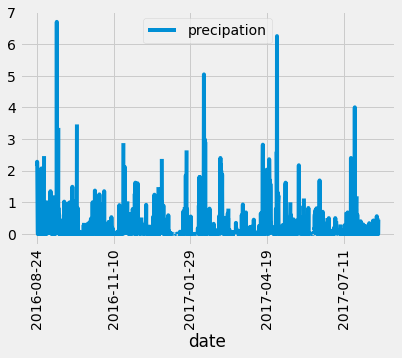

In [26]:
# Use Pandas Plotting with Matplotlib to plot the data
df.plot()
plt.xticks(rotation=90)
plt.legend()
plt.show()

Along the x-axis are the dates from our dataset, and the y-axis is the total amount of precipitation for each day. While this data shows all of the station observations, we are interested in determining weather trends. One trend we can observe based on this plot is that some months have higher amounts of precipitation than others

In [27]:
# Use Pandas to calcualte the summary statistics for the precipitation data using describe() function
df.describe()

,precipation
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [28]:
# How many stations are available in this dataset?
    # Start by using session.query() to create a query
    # Use func.count, which essentially counts a given dataset we are interested in 
        # By referencing Station.station it give us the number of stations
    #  add the .all() function to the end of this query so that our results are returned as a list.     
stations_count = session.query(func.count(Station.station)).all()
print(stations_count)

[(9,)]


In [29]:
# What are the most active stations?
# List the stations and the counts in descending order.
    # Start by using session.query() to create a query
    # Add a few parameters to our query to list the stations and the counts
    # Add group_by() function to group by station name 
    # Add the order_by function to order our results in the order that we specify, in this case, descending order
    # Add the .all() function to  return all of the results of our query 
stations_count_list = session.query(Measurement.station, func.count(Measurement.station)).\
        group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

stations_count_list

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [30]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
    # calculate the minimum, maximum, and average temperatures with the following functions: func.min, func.max, and func.avg.
    # filter to most active station
    # Add the .all() function to  return all of the results of our query 
temp_USC00519281 = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
                    filter(Measurement.station == "USC00519281").all()
temp_USC00519281

[(54.0, 85.0, 71.66378066378067)]

In [31]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
prev_year = dt.datetime(2017, 8, 23) - dt.timedelta(days=365)

    # create query using Measurement table data
    # filter to most active station
    # filter to consider only the most recent year
    # Add the .all() function to  return all of the results of our query 
results = session.query(Measurement.tobs).\
            filter(Measurement.station == "USC00519281").\
            filter(Measurement.date >= prev_year).all()
print(results[:9]) #creates super long list that is too much to view
print(" ")

# To make the results easier to read, understand, and use, we'll put them in a DataFrame.
df = pd.DataFrame(results, columns=['tobs'])
df.sample(n=5)

[(77.0,), (80.0,), (80.0,), (75.0,), (73.0,), (78.0,), (77.0,), (78.0,), (80.0,)]
 


,tobs
13,73.0
186,67.0
187,65.0
142,69.0
6,77.0


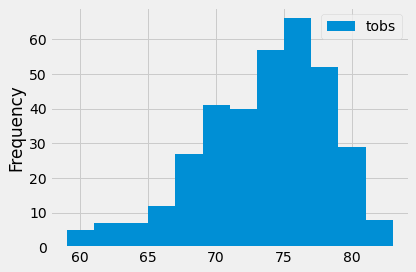

In [32]:
#use the plot() function and the hist() function and add the number of bins as a parameter.
df.plot.hist(bins=12)
#use plt.tight_layout(), we can compress the x-axis labels so that they fit into the box holding our plot.
plt.tight_layout()
    #For this particular graph, using this function won't change much, but it can be a lifesaver in situations where the x-axis doesn't fit into the box.

Looking at this plot, we can infer that a vast majority of the observations were over 67 degrees. If you count up the bins to the right of 67 degrees, you will get about 325 days where it was over 67 degrees when the temperature was observed.

In [30]:
# Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates


# Challenge